In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
sys.path.append('src')


from models import BeemGMM
from sklearn import datasets
import numpy as np
from evaluation import eval_cluster
import pandas as pd
from scipy.constants import golden
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM

# Example: How to replicate the Rainbow expermiment

#### Helper function for data set visualisation

In [2]:
def draw_data(X,y):
    standardFigureSize = (7, 7 / golden)
    # colors = np.asarray(['r', 'b', 'g', 'k', 'magenta'])
    cmap = plt.cm.jet
    cmaplist = [cmap(i) for i in range(cmap.N)]
    # create the new map
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'Custom cmap', cmaplist, cmap.N)
    K = np.max(y) + 1
    bounds = np.linspace(0, K, K + 1)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    plt.figure(figsize=standardFigureSize)
    plt.xlabel('$x0$')
    plt.ylabel('$x1$')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, norm=norm, edgecolors='k', alpha=0.5, s=7 ** 2)
    plt.grid()
    plt.axis('equal')
    # plt.tight_layout()
    plt.gcf().subplots_adjust(bottom=0.15)
    
    plt.show()

#### Generate data from the "Rainbow" simulation

In [3]:
K = 8 #Number of clusters
r = 9 #Circle radious
n_runs = 10 # Number of times to repeat the experiment

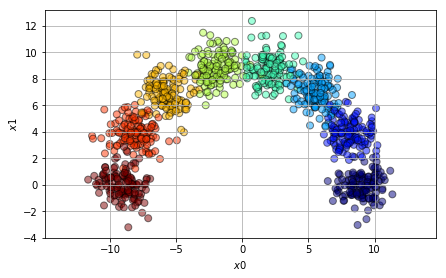

In [4]:
K = 8 #Number of clusters
r = 9 #Circle radious
means = []
for i in range(K):
    ang = (np.pi) / (K - 1) * i  #
    cplx = r * np.exp(1j * ang)
    x = np.real(cplx)
    y = np.imag(cplx)
    means.append([x, y])

X, y = datasets.make_blobs(n_samples=1000, centers=means,shuffle = True)
draw_data(X,y)

#### Fit a GMM via Boltzmann exploration expectation maximisation and compute metrics

In [5]:
statistics = []
for i in range(n_runs):
    #Define beem model object
    beem = BeemGMM(n_components=K,use_prior=False,patience=10,init='random',decay=0.97,tau=1.5)
    
    #Fit the mixture via Boltzmann exploration expectation maximization
    scores,tau,bincounts = beem.fit(X)
    
    #Assign each observation to a mixture component
    y_pred = beem.predict(X)
    
    #Compute metrics
    metric_dict = eval_cluster(y_pred,y)
    
    #Store statistics
    statistics.append(metric_dict)

#Print results
stats_df = pd.DataFrame(statistics)
print(stats_df.describe())


             ACC        ARS       HOMO        NMS
count  10.000000  10.000000  10.000000  10.000000
mean    0.923100   0.858020   0.883046   0.883505
std     0.047365   0.059591   0.034400   0.034358
min     0.835000   0.760045   0.827230   0.827913
25%     0.888000   0.806136   0.852451   0.852908
50%     0.950000   0.890700   0.901652   0.902148
75%     0.952750   0.896274   0.905081   0.905451
max     0.957000   0.905161   0.911547   0.911841


#### Fit a GMM via expecation maximisation and compute metrics

In [6]:
statistics = []
for i in range(n_runs):
    gmm = GMM(n_components=K,init_params='random',n_init = 1)
    gmm.fit(X)
    y_pred =gmm.predict(X)
    metric_dict = eval_cluster(y_pred,y)
    statistics.append(metric_dict)

stats_df = pd.DataFrame(statistics)
print(stats_df.describe())

             ACC        ARS       HOMO        NMS
count  10.000000  10.000000  10.000000  10.000000
mean    0.388000   0.292400   0.410997   0.568357
std     0.095471   0.100609   0.104763   0.073960
min     0.252000   0.142396   0.235305   0.439972
25%     0.367000   0.214788   0.377012   0.530856
50%     0.372500   0.331189   0.419072   0.574376
75%     0.432500   0.363001   0.470057   0.624363
max     0.575000   0.404682   0.547656   0.658128
